# How to Train YOLOv7 on a Custom Dataset

This tutorial is based on the [YOLOv7 repository](https://github.com/WongKinYiu/yolov7) by WongKinYiu. This notebook shows training on **your own custom objects**. Many thanks to WongKinYiu and AlexeyAB for putting this repository together.


### **Accompanying Blog Post**

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv7](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/), concurrently.

### **Steps Covered in this Tutorial**

To train our detector we take the following steps:

* Install YOLOv7 dependencies
* Load custom dataset from Roboflow in YOLOv7 format
* Run YOLOv7 training
* Evaluate YOLOv7 performance
* Run YOLOv7 inference on test images
* OPTIONAL: Deployment
* OPTIONAL: Active Learning


### Preparing a Custom Dataset

In this tutorial, we will utilize an open source computer vision dataset from one of the 90,000+ available on [Roboflow Universe](https://universe.roboflow.com).

If you already have your own images (and, optionally, annotations), you can convert your dataset using [Roboflow](https://roboflow.com), a set of tools developers use to build better computer vision models quickly and accurately. 100k+ developers use roboflow for (automatic) annotation, converting dataset formats (like to YOLOv7), training, deploying, and improving their datasets/models.

Follow [the getting started guide here](https://docs.roboflow.com/quick-start) to create and prepare your own custom dataset.

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
## Adding Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
## Adding Wandb
## 162d488a139d40a913f97c285edbe08cbfc884a5
!pip install wandb
!wandb login

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 130.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 395.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 234.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 174.6 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=b2d1a1535778956f7d42219a1ccbecc2834a1729d042eb4215981395a0d9eb47
  Stored in directory: /tmp/pip-ephem-wheel-cache-3pjy1r9c/wheels/6a/fe/dc/a7b3e03dfd0afb3a19691905bbafac1fbaebb704a02a4daeb2
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=09b130fa11d3b0162cb0b66c82af0112d261cec923455b0d83e11c2d8a5b156d
  

In [2]:
import wandb

# wandb.init(project="american_sign_language", entity="ahmedharbi")

In [3]:
#go to a the folder in google drive instead of everytime cloning and installing yolo7
%cd ~/Projects_DL/SignLanguage_YOLOv7
# !pwd

/home/mrblack/Projects_DL/SignLanguage_YOLOv7


In [4]:
# Download YOLOv7 repository and install requirements
# !git clone https://github.com/WongKinYiu/yolov7
# %cd yolov7
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Download Correctly Formatted Custom Data

Next, we'll download our dataset in the right format. Use the `YOLOv7 PyTorch` export. Note that this model requires YOLO TXT annotations, a custom YAML file, and organized directories. The roboflow export writes this for us and saves it in the correct spot.


In [5]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 48.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 171.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 241.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 189.0 MB/s eta 0:00:00
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9301 sha256=30816627b786aab5623c28e263031a401f7886acac856a33747ea7b756a19bac
  Stored in directory: /tmp/pip-ephem-wheel-cache-ae2k4ep0/wheels/a4/ea/9f/d399747c9a8cc7e57af9dc5dfa5e91f60efa41a80a09609

In [6]:
# REPLACE with your custom code snippet generated above

# !pip install roboflow

## Basic Dataset ##

# from roboflow import Roboflow
# rf = Roboflow(api_key="wtTb80vvwZgOIzu6tkYw")
# project = rf.workspace("sign-language-asbbx").project("american-sign-language-letters-jxlux")
# dataset = project.version(1).download("yolov7")

## Augmented Dataset ##
from roboflow import Roboflow
rf = Roboflow(api_key="wtTb80vvwZgOIzu6tkYw")
project = rf.workspace("sign-language-asbbx").project("american-sign-language-letters-jxlux")
# dataset = project.upload("American-Sign-Language-Letters-2")
dataset = project.version(2).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to American-Sign-Language-Letters-2 in yolov7pytorch:: 100%|██████████| 1451/1451 [00:00<00:00, 11145.73it/s]


In [ ]:
# dataset = "/content/drive/MyDrive/SignLanguageDetection/yolov7/American-Sign-Language-Letters-2"

# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [10]:
%cd yolov7
!pwd

/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7
/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7


In [ ]:
# run this cell to begin training
# !pwd
# %cd /content/MyDrive/SignLanguageDetection/yolov7

## getting the training weights from the last epoch trained: /runs/train/exp2/weights/last.pt
## Number of epochs: 530 epochs 

!python train.py --batch 4 --epochs 100 --data {dataset.location}/data.yaml \
--weights '/content/drive/MyDrive/SignLanguageDetection/yolov7/runs/train/exp6/weights/best.pt' \
--device 0 --img 640 640 --cfg '/cfg/training/yolov7-tiny.yaml'


YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='./cfg/training/yolov7-tiny.yaml', data='/content/drive/MyDrive/SignLanguageDetection/yolov7/American-Sign-Language-Letters-2/data.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/SignLanguageDetection/yolov7/runs/train/exp5/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/trai

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [11]:
# Run evaluation
!python detect.py --weights runs/train/exp5/weights/best.pt --conf 0.5 --source {dataset.location}/test/images


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/home/mrblack/Projects_DL/SignLanguage_YOLOv7/American-Sign-Language-Letters-2/test/images', update=False, view_img=False, weights=['runs/train/exp5/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7982.3125MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6075246 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/home/mrblack/pyenvs/venv_signLanguage/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type

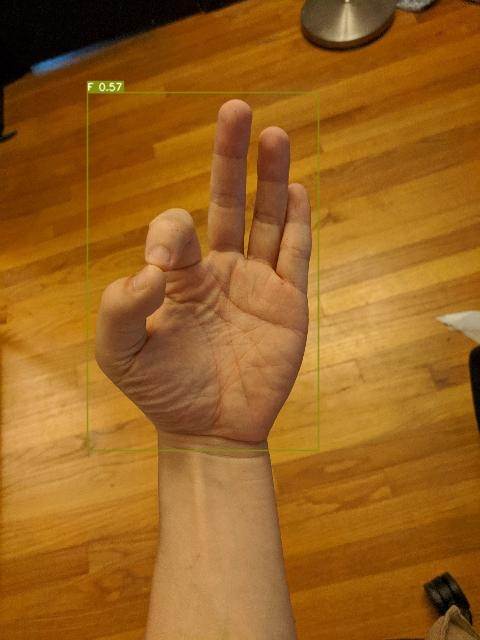

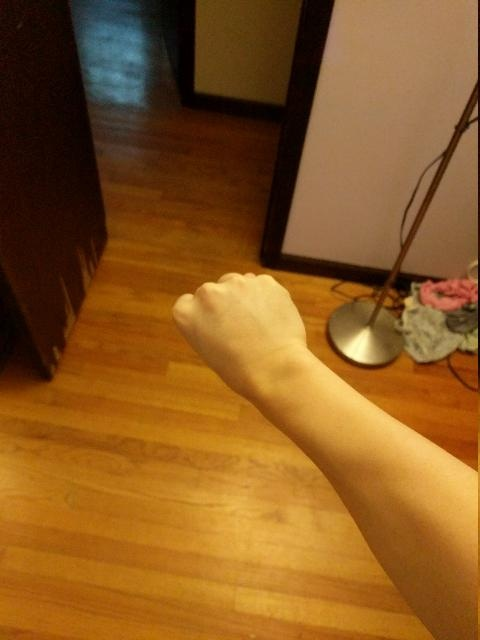

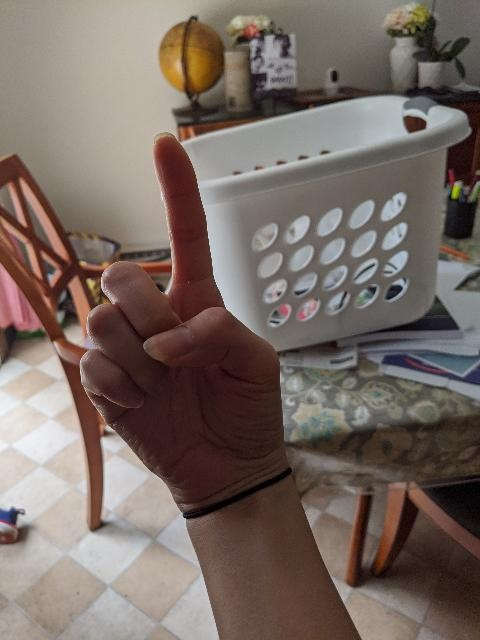

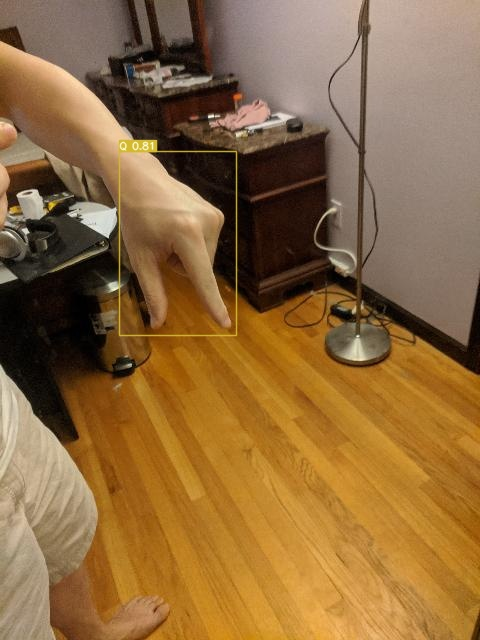

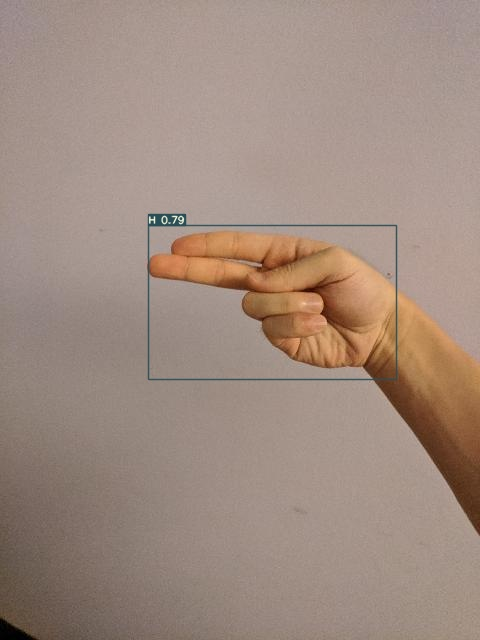

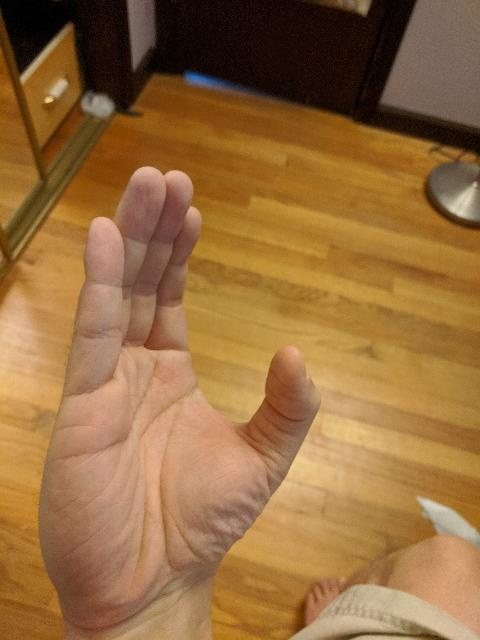

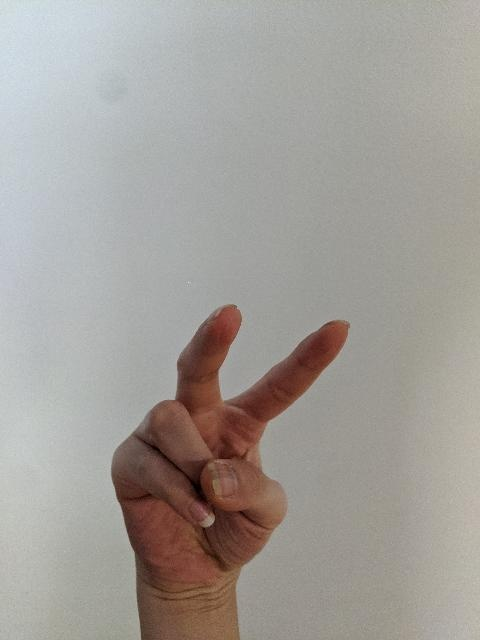

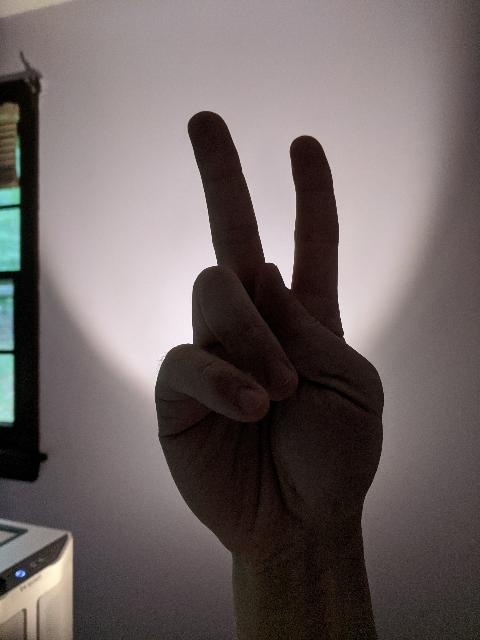

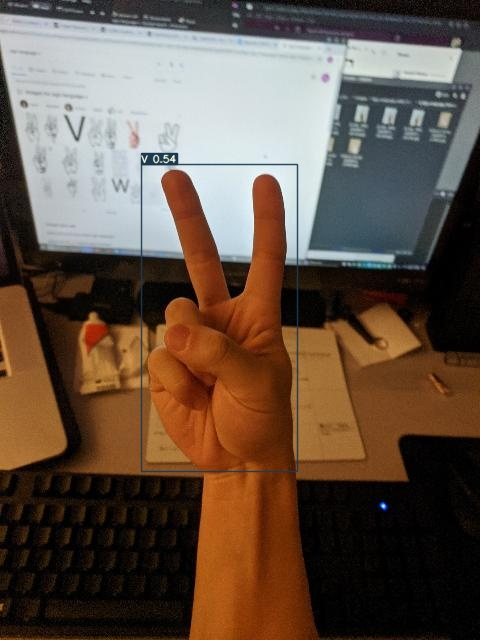

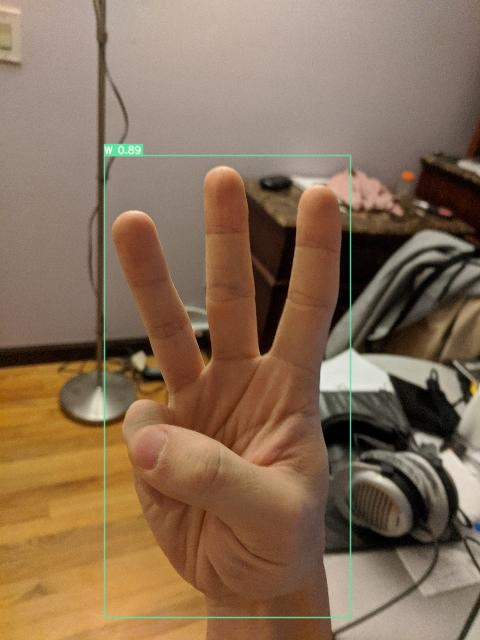

In [16]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10 # max images to print
for imageName in glob.glob('/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7/runs/detect/exp6/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# Reparameterize for Inference

https://github.com/WongKinYiu/yolov7/blob/main/tools/reparameterization.ipynb

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [13]:
!pwd

/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7


In [14]:
!ls

American-Sign-Language-Letters-2  export.zip	    runs
best.onnx			  figure	    scripts
best.pt				  hubconf.py	    test.py
best.torchscript.pt		  inference	    tools
best.torchscript.ptl		  LICENSE.md	    traced_model.pt
cfg				  models	    train_aux.py
data				  paper		    train.py
deploy				  __pycache__	    utils
detect.py			  README.md	    wandb
export.py			  requirements.txt  yolov7_training.pt


In [ ]:
%cd drive/MyDrive/SignLanguageDetection/yolov7/

/content/drive/MyDrive/SignLanguageDetection/yolov7


In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp6/weights/best.pt
!zip export.zip runs/train/exp6/*

  adding: runs/detect/ (stored 0%)
  adding: runs/detect/exp/ (stored 0%)
  adding: runs/detect/exp/A22_jpg.rf.beab2ab0db6a2c06a0725da776ff9d74.jpg (deflated 6%)
  adding: runs/detect/exp/B14_jpg.rf.2d3c0b59c33ccf1e54d3af243d8c4962.jpg (deflated 8%)
  adding: runs/detect/exp/B15_jpg.rf.afbf58f9f8873c4664b864aa9e96992b.jpg (deflated 5%)
  adding: runs/detect/exp/B19_jpg.rf.46ebe8d13c488a6c02e5f0ca324e202b.jpg (deflated 5%)
  adding: runs/detect/exp/C17_jpg.rf.54e3fecb58072ec120d178cabadce697.jpg (deflated 5%)
  adding: runs/detect/exp/C19_jpg.rf.b33c6eafb656fb73afce13710a66c728.jpg (deflated 5%)
  adding: runs/detect/exp/C22_jpg.rf.88f6392083f3358e4a95ad8e72e50aac.jpg (deflated 9%)
  adding: runs/detect/exp/C23_jpg.rf.3df332b50f016cc08ac947c862a71415.jpg (deflated 6%)
  adding: runs/detect/exp/D1_jpg.rf.9efb62d8b943a1514898af6b905019e1.jpg (deflated 5%)
  adding: runs/detect/exp/F17_jpg.rf.4c754453184d67e8ba1c3e9a9eb2a8ea.jpg (deflated 4%)
  adding: runs/detect/exp/F3_jpg.rf.865bba961b5

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
# rf = Roboflow(api_key="YOUR_API_KEY")                               # used above to load data
# inference_project =  rf.workspace().project("YOUR_PROJECT_NAME")    # used above to load data
# model = inference_project.version(1).model

# upload_project = rf.workspace().project("YOUR_PROJECT_NAME")

# print("inference reference point: ", inference_project)
# print("upload destination: ", upload_project)

In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it 

# confidence_interval = [10,70]                                   # [lower_bound_percent, upper_bound_percent]

# for prediction in predictions:                                  # predictions list to loop through
#   if(prediction['confidence'] * 100 >= confidence_interval[0] and 
#           prediction['confidence'] * 100 <= confidence_interval[1]):
        
#           # upload on success!
#           print(' >> image uploaded!')
#           upload_project.upload(image, num_retry_uploads=3)     # upload image in question

# Next steps

Congratulations, you've trained a custom YOLOv7 model! Next, start thinking about deploying and [building an MLOps pipeline](https://docs.roboflow.com) so your model gets better the more data it sees in the wild.